<b>Importing necessary packages</b>

In [2]:
import numpy as np
from numpy import nan
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
db = pd.read_csv('http://bit.ly/w-data')
db.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<b>The dataset doesn't contain any null objects.</b>

In [5]:
db.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


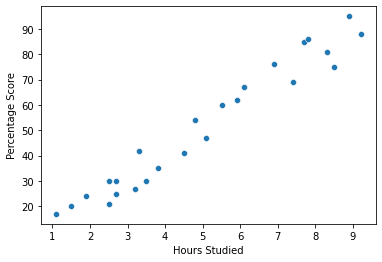

In [25]:
sns.scatterplot(data=db, x='Hours', y='Scores', palette='bright')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

In [39]:
print('min hours:',db['Hours'].min())
print('max hours:',db['Hours'].max())

min hours: 1.1
max hours: 9.2


In [40]:
print('min score:',db['Hours'].min())
print('max score:',db['Hours'].max())

min score: 1.1
max score: 9.2


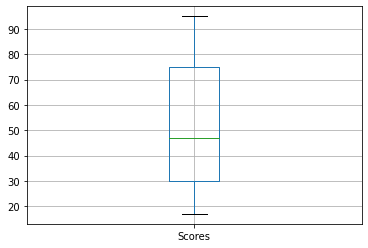

In [28]:
db.boxplot(['Scores'])

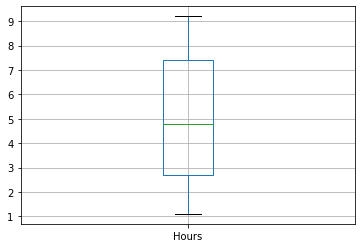

In [29]:
db.boxplot(['Hours'])

<b>there are no outliers in the given dataset.</b>

In [38]:
db["Hours"].value_counts(bins=4).sort_index()

(1.0910000000000002, 3.125]    7
(3.125, 5.15]                  7
(5.15, 7.175]                  4
(7.175, 9.2]                   7
Name: Hours, dtype: int64

In [37]:
db["Scores"].value_counts(bins=4).sort_index()

(16.921, 36.5]    10
(36.5, 56.0]       4
(56.0, 75.5]       5
(75.5, 95.0]       6
Name: Scores, dtype: int64

<b>The hours and scores are normally distributed hence we can easily perform Linear Regression.</b>

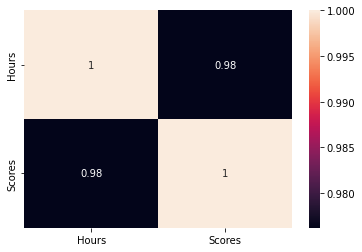

In [42]:
sns.heatmap(db.corr(),annot=True)

<b>Hours and Scores are highly Positively correlated to each other</b>

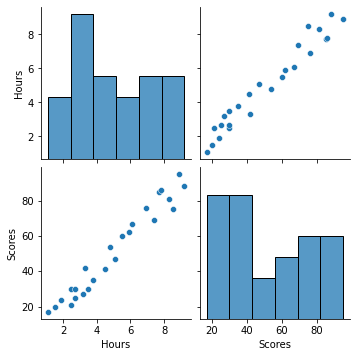

In [43]:
sns.pairplot(db)

<b>Splitting the dataset for training and testing</b>

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x=db.iloc[:,:-1].values
y=db.iloc[:,1].values
x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.60,test_size=0.40,random_state=0)

<b>Training Linear Regression Model</b>

In [50]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

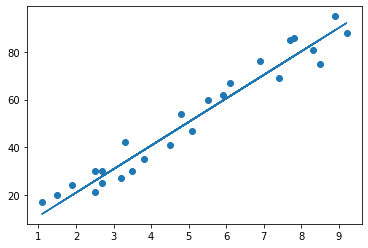

In [52]:
line = model.coef_*x+model.intercept_
# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [56]:
y_pred = model.predict(x_test)
y_pred

array([15.9477618 , 32.77394723, 74.344523  , 25.84551793, 59.49788879,
       38.71260091, 19.90686425, 78.30362545, 69.39564493, 11.98865934])

<b>Predicting Scores</b>

In [53]:
print('Test Score')
print(model.score(x_test, y_test))
print('Training Score')
print(model.score(x_train, y_train))

Test Score
0.956640847232559
Training Score
0.9440108159733135


In [57]:

output = pd.DataFrame({'Actual Score': y_test,'Predicted Score': y_pred, 'Residual':y_test-y_pred })
print(output.head())

   Actual Score  Predicted Score  Residual
0            20        15.947762  4.052238
1            27        32.773947 -5.773947
2            69        74.344523 -5.344523
3            30        25.845518  4.154482
4            62        59.497889  2.502111


<b>What will be predicted score if a student study for 9.25 hrs in a day?</b>

In [72]:
print('Score of student who studied for 9.25 hours a day', model.predict([[9.25]]))

Score of student who studied for 9.25 hours a day [92.65537185]


<h1>Model Evaluation</h1>

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [67]:
print('Mean absolute error : ', metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error :  4.894510863410609


In [68]:
print('Root mean square error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root mean square error :  5.102408224327238


In [69]:
metrics.r2_score(y_test,y_pred)

0.956640847232559

In [70]:
from scipy import stats
t_statistic, pvalues =stats.ttest_ind(y_test, y_pred)
print('t-statistic -->',t_statistic)
print('P-value -->',pvalues)

t-statistic --> 0.16808369709885795
P-value --> 0.8683916002725192


In [71]:
f_statistic, pvalues =stats.f_oneway(y_test, y_pred)
print('f-statistic -->',f_statistic)
print('P-value -->',pvalues)

f-statistic --> 0.028252129230420545
P-value --> 0.8683916002725187


<h3>summary</h3>

The datset given to us is a clean dataset with 2 attributes Hours and Scores and no null values present.
With the help of seaborn and matplotlib we visualized the data and found it to be normally distributed.

We performed Linear Regression operation on the given dataset and the model had an accuracy of 95%. Thus, the model could predict the score for a student who studies for 9.25hrs in a day which is 92.65%. 

In test sample R-square ,T-test, F-test were performed to measure the model performance in terms of goodness of fit & randomness of variance between actual and the predicted values.